# Task 1 (Supervised Learning) - Predicting Donation and Donation Type

In this task you should target 3 classification tasks:
1. **Predicting  Donation (binary classification task)**; 
2. **Predicting Donation TYPE (multiclass classification)**; and
3. **Train specialized models for SES (socioeconomic classification)**.

**You should:**

* Choose **one classifier in each category**: Tree models, Rule models, Linear models, Distance-based models, and Probabilistic models.
* Use cross-validation to evaluate the results. 
* Present and discuss the results for different evaluation measures, present confusion matrices. Remember that not only overall results are important. Check what happens when learning to predict each class.
* Describe the parameters used for each classifier and how their choice impacted or not the results.
* Choose the best classifier and fundament you choice.
* **Discuss critically your choices and the results!**

## Supervised Learning

Supervised learning refers to the task of inferring a function model from labeled training data. The training data consists on a set of examples in which each example is a pair of an input object (typically a vector) and a desired output value. A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples. In an optimal scenario, the algorithm correctly determines the class labels for unseen instances. However, this requires the learning algorithm to be able to generalize from the training data to novel situations. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from multi_imbalance.utils.plot import plot_cardinality_and_2d_data
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import tree
import wittgenstein as lw
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

### Preprocessing Data for Classification

In [2]:
df_clean = pd.read_csv('donors_dataset_clean.csv') 
df_clean.head()

,TARGET_B,TARGET_D,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,SES,CLUSTER_CODE,INCOME_GROUP,MOR_HIT_RATE,MEDIAN_HOME_VALUE,...,LIFETIME_GIFT_RANGE_BIN,LAST_GIFT_AMT_BIN,CARD_PROM_12_BIN,NUMBER_PROM_12_BIN,MONTHS_SINCE_LAST_GIFT_BIN,MONTHS_SINCE_FIRST_GIFT_BIN,FILE_CARD_GIFT_BIN,INCOME_GROUP_BIN,RECENCY_STATUS_96NK_e,DONATION_TYPE
0,1.0,10.0,137.0,79.000000,0.0,2.0,45.0,7.0,0.0,334.0,...,"(15.0, 30.0]","(15.0, 30.0]","(3.0, 9.0]","(20.0, 30.0]","(-0.1, 8.0]","(120.0, 260.0]","(10.0, 20.0]","(6.4, 8.337]",4.0,D
1,0.0,0.0,113.0,75.000000,0.0,1.0,11.0,5.0,0.0,2388.0,...,"(15.0, 30.0]","(15.0, 30.0]","(9.0, 14.0]","(30.0, 64.0]","(-0.1, 8.0]","(80.0, 120.0]","(10.0, 20.0]","(4.4, 5.4]",4.0,NaN
2,0.0,0.0,92.0,62.695162,0.0,2.0,4.0,6.0,0.0,1688.0,...,"(-0.1, 15.0]","(-0.1, 15.0]","(9.0, 14.0]","(30.0, 64.0]","(-0.1, 8.0]","(80.0, 120.0]","(10.0, 20.0]","(5.4, 6.4]",0.0,NaN
3,0.0,0.0,101.0,74.000000,0.0,2.0,49.0,2.0,8.0,514.0,...,"(15.0, 30.0]","(15.0, 30.0]","(3.0, 9.0]","(10.0, 20.0]","(16.0, 24.0]","(80.0, 120.0]","(-0.1, 10.0]","(1.4, 2.4]",0.0,NaN
4,0.0,0.0,101.0,63.000000,0.0,3.0,8.0,3.0,0.0,452.0,...,"(-0.1, 15.0]","(-0.1, 15.0]","(3.0, 9.0]","(10.0, 20.0]","(16.0, 24.0]","(80.0, 120.0]","(-0.1, 10.0]","(2.4, 3.4]",0.0,NaN


#### Data and classes 

In this task, we only need to predict if the existance of donation. Thus we will use a subset of the dataset without considering the columns: DONATION_TYPE, TARGET_D and binned data.

In [3]:
categorical_columns = ['DONOR_AGE_BIN', 'MONTHS_SINCE_ORIGIN_BIN', 'INCOME_GROUP_BIN','MOR_HIT_RATE_BIN', 'MEDIAN_HOME_VALUE_BIN', 
                       'MEDIAN_HOUSEHOLD_INCOME_BIN', 'PCT_OWNER_OCCUPIED_BIN', 'PER_CAPITA_INCOME_BIN', 'PCT_ATTRIBUTE1_BIN',
                      'PCT_ATTRIBUTE2_BIN', 'PCT_ATTRIBUTE3_BIN', 'PCT_ATTRIBUTE4_BIN', 'RECENT_RESPONSE_PROP_BIN',
                      'RECENT_AVG_GIFT_AMT_BIN', 'RECENT_CARD_RESPONSE_PROP_BIN', 'RECENT_AVG_CARD_GIFT_AMT_BIN',
                      'RECENT_RESPONSE_COUNT_BIN', 'RECENT_CARD_RESPONSE_COUNT_BIN', 'MONTHS_SINCE_LAST_PROM_RESP_BIN',
                      'LIFETIME_CARD_PROM_BIN', 'LIFETIME_PROM_BIN', 'LIFETIME_GIFT_AMOUNT_BIN','LIFETIME_GIFT_COUNT_BIN',
                      'LIFETIME_AVG_GIFT_AMT_BIN', 'LIFETIME_GIFT_RANGE_BIN', 'LAST_GIFT_AMT_BIN', 'CARD_PROM_12_BIN',
                      'NUMBER_PROM_12_BIN', 'MONTHS_SINCE_LAST_GIFT_BIN', 'MONTHS_SINCE_FIRST_GIFT_BIN', 'FILE_CARD_GIFT_BIN']

In [4]:
# Subset
df_clean.drop(columns = ['DONATION_TYPE','TARGET_D'], inplace=True)
df_clean.drop(columns = categorical_columns, inplace=True)

In [5]:
# Data preparation: from dataframe to arrays
nc = df_clean.shape[1] 
matrix = df_clean.values
X = matrix [:, 1:nc] 
y = matrix [:, 0]         
features = df_clean.columns.values[1:nc] 
target = df_clean.columns.values[0]

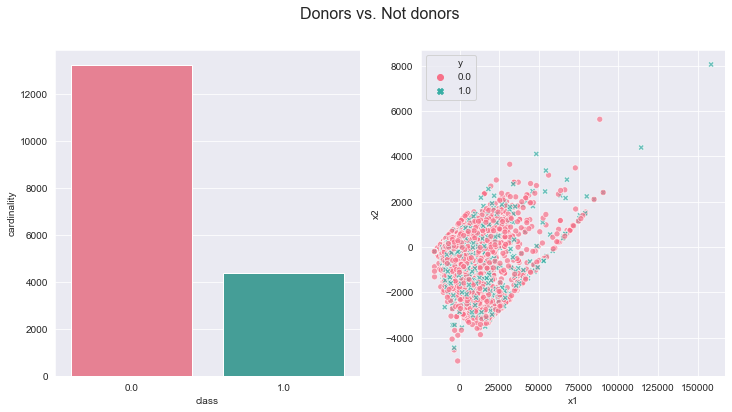

In [6]:
# Visualization of the classes
# Plot 1 (left): Barplot with the cardinality of classes from y
# Plot2 (right): Scatter plot of X transformed to two dimensions using PCA
plot_cardinality_and_2d_data(X, y, 'Donors vs. Not donors')

The data is imbalanced. The 'Not donors' class has more datapoints when compared to the 'Donors' class. Instead of resorting to under/oversampling, we will perform a data split with stratification and account for this difference. On the other hand, the sklearn.model_selection.cross_val_score() splitting strategy we will use (cv = int) also stratifies the data by appliyng a StratifiedKFold approach.

#### Traning and Testing Sets 

To evaluate the models, we need to test them on a testing set independent from the training set. This separate analysis allows for overfitting control.

In [7]:
# Split the data 
# Training set: 0.75
# Testing set: 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y) 

### Learning Classifiers

Learning Classifiers are used for describing a set of predetermined classes. Each tuple/sample is assumed to belong to a predefined class, as determined by the class label attribute. For the present task we tested a Naive Bayes Classifier (NBC), a Decision Tree Classifier (DT), a Linear Regression (LR) model, the RIPPER algorithm and the K-Nearest Neighbours (KNN) algorithm as examples of probabilistic models, tree models, liner models, rule models and distance-based models, respectively.

With more than three variables, it becomes difficult to visualize relations between variables. However, these relationships may be taken into account when we apply a machine learning model. The interesting aspect of the NBC, comparing to other models, is that it forgets about any type of correlation between variables. It assumes there is an independent relation between _Xi_ and Y. Due to this particularity, it is often used as a baseline model. If a model performs worse than NBC, it should be discarted.

DT are very popular in machine learning. Their construction does not require any domain knowledge or parameter setting, and therefore it is appropriate for exploratory knowledge discovery. Their representation of acquired knowledge in tree form is intuitive and generally easy to interpret. The learning and classification steps of decision tree induction are simple and fast. In general, DT have good accuracy. It is advisable not to construct big decision trees.

KNN classification is a conventional non-parametric classifier, which has been used as the baseline classifier in many pattern classification problems. It is based on measuring the distances between the test data and each training example to decide the final classification output. The most widely used distance metric in KNN is the Eucledian Distance. Even though KNN performes better as the dataset increases, it is extremely sensitive to the number of variables in the dataset, leading to a worse performance as the quantity of variables increases.

LR is a linear model for binary classification predictive modeling. It is used to tell the probability and classify new samples using continuous and discrete measurements. It belongs to the linear models because it predicts the log-odds of an example belonging to class 1, which is converted to a probability via the logistic function. Thus, it predicts whether a data point is True or False rather then predicting continuous values. 
Instead of fitting a line to the data, LR fits an “S” shaped logistic function, which has a counter domain from 0 to 1 (the probability of Y given X). In addition, the data is modeled using the “maximum likelihood” in which we assume a probability distribution for the target variable to calculate the likelihood of observing the outcome, given the input data and the model. Then, the curve with the maximum value of likelihood is selected.

Finally, rule models refer to a simple if-else statement consisting on a condition and a prediction. The induced rules are easily interpretable and thus these classifiers are generally used to generate descriptive models. Rules can be generated either using a general-to-specific approach or specific-to-general. In the first, we start with a rule with no antecedent and keep on adding conditions until major improvements are observed in the evaluation metrics. While in the second, the model keeps on removing the conditions from a rule covering a very specific case. For this task we chose the RIPPER model, which uses a post-processing phase (rule pruning) to optimize the decision list or set. RIPPER can run in ordered or unordered mode and generate either a decision list or decision set.

#### Model Evaluation

In [8]:
## Code to supress warnings. Since the Logistic Regression model does not converge, an warning is issued.
from warnings import filterwarnings
filterwarnings('ignore')

In [9]:
## Classifiers - Set the different parameters for each model

# Decision Trees
dt = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=30)
# Naive Bayes Classifier
gnb = GaussianNB()
# Rule Models: RIPPER
ripper_clf = lw.RIPPER()
# Linear Regression
lr = LogisticRegression(max_iter=400)
# K-Nearest Neighbours
knn = neighbors.KNeighborsClassifier(n_neighbors=6)

##### Cross-Validation 

In [10]:
# For Decision Tree, Naive Bayes Classifier, Linear Regression and K-Nearest Neighbours
models = [dt, gnb, lr, knn]
names = ['Decision Tree', 'Naive Bayes Classifier','Linear Regression','K-Nearest Neighbours']

for model, name in zip(models, names):
    f1_macro = cross_val_score(model, X, y, cv=10, scoring='f1_macro')
    f1_weighted = cross_val_score(model, X, y, cv=10, scoring = 'f1_weighted')
    recall_macro = cross_val_score(model, X, y, cv=10, scoring='recall_macro')
    recall_weighted  = cross_val_score(model, X, y, cv=10, scoring = 'recall_weighted')
    accuracy_cv = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    
    print('Cross-Validation {name} - F1 Macro: %0.2f (+/- %0.2f)'.format(name=name) % (f1_macro.mean(), f1_macro.std() * 2))
    print('Cross-Validation {name} - F1 Weighted: %0.2f (+/- %0.2f)'.format(name=name) % (f1_weighted.mean(), f1_weighted.std() * 2))
    print('Cross-Validation {name} - Recall Macro: %0.2f (+/- %0.2f)'.format(name=name) % (recall_macro.mean(), recall_macro.std() * 2))
    print('Cross-Validation {name} - Recall Weighted: %0.2f (+/- %0.2f)'.format(name=name) % (recall_weighted.mean(), recall_weighted.std() * 2))
    print('Cross-Validation {name} - Accuracy: %0.2f (+/- %0.2f)'.format(name=name) % (accuracy_cv.mean(), accuracy_cv.std() * 2),'\n')

Cross-Validation Decision Tree - F1 Macro: 0.47 (+/- 0.05)
Cross-Validation Decision Tree - F1 Weighted: 0.66 (+/- 0.02)
Cross-Validation Decision Tree - Recall Macro: 0.51 (+/- 0.02)
Cross-Validation Decision Tree - Recall Weighted: 0.75 (+/- 0.01)
Cross-Validation Decision Tree - Accuracy: 0.75 (+/- 0.01) 

Cross-Validation Naive Bayes Classifier - F1 Macro: 0.55 (+/- 0.04)
Cross-Validation Naive Bayes Classifier - F1 Weighted: 0.66 (+/- 0.09)
Cross-Validation Naive Bayes Classifier - Recall Macro: 0.56 (+/- 0.05)
Cross-Validation Naive Bayes Classifier - Recall Weighted: 0.67 (+/- 0.11)
Cross-Validation Naive Bayes Classifier - Accuracy: 0.67 (+/- 0.11) 

Cross-Validation Linear Regression - F1 Macro: 0.43 (+/- 0.01)
Cross-Validation Linear Regression - F1 Weighted: 0.65 (+/- 0.00)
Cross-Validation Linear Regression - Recall Macro: 0.50 (+/- 0.00)
Cross-Validation Linear Regression - Recall Weighted: 0.75 (+/- 0.01)
Cross-Validation Linear Regression - Accuracy: 0.75 (+/- 0.01) 

Cr

##### Training vs. Testing 

In [11]:
# Rule models
rm_train, rm_test = train_test_split(df_clean,random_state=42)
ripper_clf = lw.RIPPER()
ripper_clf.fit(rm_train, class_feat='TARGET_B',pos_class=1)
ripper_clf.ruleset_

<Ruleset [PEP_STAR=1.0^LAST_GIFT_AMT=0.0-6.0^PCT_ATTRIBUTE2=36.0-40.0^RECENT_CARD_RESPONSE_PROP=0.36-0.5^RECENT_RESPONSE_COUNT=4.0-6.0^DONOR_GENDER_e=0.0]>

Accuracy Score Training Set RIPPER - F1 Macro:  0.4319986915811424
Accuracy Score Training Set RIPPER - F1 Weighted:  0.645665308999552
Accuracy Score Training Set RIPPER - Recall Macro:  0.5014175861730609
Accuracy Score Training Set RIPPER - Recall Weighted:  0.7514188422247446
Accuracy Score Training Set RIPPER - Accuracy:  0.7514188422247446 

Accuracy Score Training Set Decision Tree - F1 Macro:  0.4653030406985724
Accuracy Score Training Set Decision Tree - F1 Weighted:  0.662449654701125
Accuracy Score Training Set Decision Tree - Recall Macro:  0.5157240970277683
Accuracy Score Training Set Decision Tree - Recall Weighted:  0.7550510783200908
Accuracy Score Training Set Decision Tree - Accuracy:  0.7550510783200908 

Accuracy Score Training Set Naive Bayes Classifier - F1 Macro:  0.5593394205350986
Accuracy Score Training Set Naive Bayes Classifier - F1 Weighted:  0.6763018481498373
Accuracy Score Training Set Naive Bayes Classifier - Recall Macro:  0.557530382710151
Accuracy S

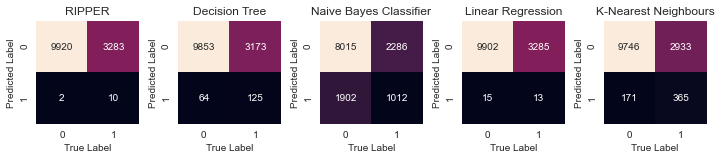

In [12]:
models = [ripper_clf, dt, gnb, lr, knn]
names = ['RIPPER','Decision Tree', 'Naive Bayes Classifier','Linear Regression','K-Nearest Neighbours']

f, axes = plt.subplots(1, 5, figsize=(10, 10))
f.tight_layout()

for model, name, i in zip(models, names, range(len(names))):
    
    if model == ripper_clf and name == 'RIPPER':
        class_feat='TARGET_B'
        rm_X_train = rm_train.drop(class_feat, axis=1)
        rm_y_train = rm_train[class_feat]
        rm_y_pred = ripper_clf.predict(rm_X_train)
        
        f1_macro = f1_score(rm_y_train, rm_y_pred, average='macro')
        f1_wighted = f1_score(rm_y_train, rm_y_pred, average='weighted')
        recall_macro = recall_score(rm_y_train, rm_y_pred, average='macro')
        recall_wighted = recall_score(rm_y_train, rm_y_pred, average='weighted')
        accuracy = accuracy_score(rm_y_train, rm_y_pred)
        
        print('Accuracy Score Training Set {name} - F1 Macro: '.format(name=name), f1_macro)
        print('Accuracy Score Training Set {name} - F1 Weighted: '.format(name=name), f1_wighted)
        print('Accuracy Score Training Set {name} - Recall Macro: '.format(name=name), recall_macro)
        print('Accuracy Score Training Set {name} - Recall Weighted: '.format(name=name), recall_wighted)
        print('Accuracy Score Training Set {name} - Accuracy: '.format(name=name), accuracy, '\n')
        
        # Confusion Matrix
        cm_train = confusion_matrix(rm_y_train, rm_y_pred)
        sns.heatmap(cm_train.T, square=True, annot=True, fmt='d', cbar=False, ax=axes[i])
        axes[i].set_xlabel('True Label')
        axes[i].set_ylabel('Predicted Label');
        axes[i].set_title(name)
    
    else:

        model = model.fit(X_train, y_train)
        y_pred = model.predict(X_train)
        
        f1_macro = f1_score(y_train, y_pred, average='macro')
        f1_wighted = f1_score(y_train, y_pred, average='weighted')
        recall_macro = recall_score(y_train, y_pred, average='macro')
        recall_wighted = recall_score(y_train, y_pred, average='weighted')
        accuracy = accuracy_score(y_train, y_pred)
        
        print('Accuracy Score Training Set {name} - F1 Macro: '.format(name=name), f1_macro)
        print('Accuracy Score Training Set {name} - F1 Weighted: '.format(name=name), f1_wighted)
        print('Accuracy Score Training Set {name} - Recall Macro: '.format(name=name), recall_macro)
        print('Accuracy Score Training Set {name} - Recall Weighted: '.format(name=name), recall_wighted)
        print('Accuracy Score Training Set {name} - Accuracy: '.format(name=name), accuracy, '\n')
        
        cm_train = confusion_matrix(y_train, y_pred)

        sns.heatmap(cm_train.T, square=True, annot=True, fmt='d', cbar=False, ax=axes[i])
        axes[i].set_xlabel('True Label')
        axes[i].set_ylabel('Predicted Label');
        axes[i].set_title(name)

Accuracy Score Testing Set RIPPER - F1 Macro:  0.4283119242247308
Accuracy Score Testing Set RIPPER - F1 Weighted:  0.6419818310440586
Accuracy Score Testing Set RIPPER - Recall Macro:  0.4998485766202302
Accuracy Score Testing Set RIPPER - Recall Weighted:  0.7492056286881525
Accuracy Score Testing Set RIPPER - Accuracy:  0.7492056286881525 

Accuracy Score Testing Set Decision Tree - F1 Macro:  0.4672414729122146
Accuracy Score Testing Set Decision Tree - F1 Weighted:  0.6635709469830743
Accuracy Score Testing Set Decision Tree - Recall Macro:  0.5165407263331181
Accuracy Score Testing Set Decision Tree - Recall Weighted:  0.7553336359509759
Accuracy Score Testing Set Decision Tree - Accuracy:  0.7553336359509759 

Accuracy Score Testing Set Naive Bayes Classifier - F1 Macro:  0.5562527208535332
Accuracy Score Testing Set Naive Bayes Classifier - F1 Weighted:  0.6732455432458829
Accuracy Score Testing Set Naive Bayes Classifier - Recall Macro:  0.5547424287907223
Accuracy Score Testi

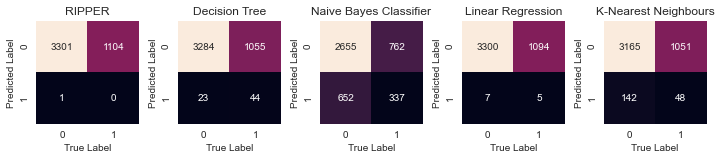

In [13]:
# Testing Data

f, axes = plt.subplots(1, 5, figsize=(10, 10))
f.tight_layout()

for model, name, i in zip(models, names, range(len(names))):
    
    if model == ripper_clf and name == 'RIPPER':
        class_feat='TARGET_B'
        rm_X_test = rm_test.drop(class_feat, axis=1)
        rm_y_test = rm_test[class_feat]
        rm_y_pred = ripper_clf.predict(rm_X_test)
        
        f1_macro = f1_score(rm_y_test, rm_y_pred, average='macro')
        f1_wighted = f1_score(rm_y_test, rm_y_pred, average='weighted')
        recall_macro = recall_score(rm_y_test, rm_y_pred, average='macro')
        recall_wighted = recall_score(rm_y_test, rm_y_pred, average='weighted')
        accuracy = accuracy_score(rm_y_test, rm_y_pred)
        
        print('Accuracy Score Testing Set {name} - F1 Macro: '.format(name=name), f1_macro)
        print('Accuracy Score Testing Set {name} - F1 Weighted: '.format(name=name), f1_wighted)
        print('Accuracy Score Testing Set {name} - Recall Macro: '.format(name=name), recall_macro)
        print('Accuracy Score Testing Set {name} - Recall Weighted: '.format(name=name), recall_wighted)
        print('Accuracy Score Testing Set {name} - Accuracy: '.format(name=name), accuracy, '\n')
        
        # Confusion Matrix
        cm_test = confusion_matrix(rm_y_test, rm_y_pred)
        sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False, ax=axes[i])
        axes[i].set_xlabel('True Label')
        axes[i].set_ylabel('Predicted Label');
        axes[i].set_title(name)
    
    else:
    
        model = model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        f1_macro = f1_score(y_test, y_pred, average='macro')
        f1_wighted = f1_score(y_test, y_pred, average='weighted')
        recall_macro = recall_score(y_test, y_pred, average='macro')
        recall_wighted = recall_score(y_test, y_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_pred)
        
        print('Accuracy Score Testing Set {name} - F1 Macro: '.format(name=name), f1_macro)
        print('Accuracy Score Testing Set {name} - F1 Weighted: '.format(name=name), f1_wighted)
        print('Accuracy Score Testing Set {name} - Recall Macro: '.format(name=name), recall_macro)
        print('Accuracy Score Testing Set {name} - Recall Weighted: '.format(name=name), recall_wighted)
        print('Accuracy Score Testing Set {name} - Accuracy: '.format(name=name), accuracy, '\n')
        
        cm_test = confusion_matrix(y_test, y_pred)

        sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False, ax=axes[i])
        axes[i].set_xlabel('True Label')
        axes[i].set_ylabel('Predicted Label');
        axes[i].set_title(name)

### Results and Discussion 

**Setting the Parameters**

The parameters chosen for each classifier were optimized to improve accuracy. For the DT classifier, using 'entropy' to determine the quality of a split displayed slightly better results than the gini impurity function (criterion='gini'). In addition, adjusting the max_leaf_nodes to 30 also proved beneficial, yet increasing this value did not show any further improvements. No other parameter seemed to have an impact on the scores. As for the Logistic Regression, increasing the maximum number of iterations did not lead to model convergence. Therefore, we established the minimum value for max_iter that would still display the best performance possible. Interestingly, this was the parameter that had greater impact on the scores. The adjustment of the solvers did not show any differences in performance. The algorithm choice for the KNN classifier did not affect the model scores. However, adjusting the number of neighbours did have an impact on performance. We found the optimal value of neighbours to be 6, as lower or higher values lead to worse results. Finally, default parameters were maintained for both NBC and RIPPER algorithm.

**Metrics: F1 Macro, F1 Weighted, Recall Macro, Recall Weighted and Accuracy**

Different metrics were applied to evaluate the performance of the different classifiers - F1 Macro, F1 Weighted, Recall Macro, Recall Weighted and Accuracy. A 'macro' average calculates the metric for each label and performs an unweighted average. This measurement is not appropriate for imbalanced data and, as such, metrics that include this averaging method will display poor results for our particular data. This is clear for both F1 and Recall scores. On the other hand, simply changing the averaging strategy to 'weighted', takes into account any imbalencement present in the data. Accordingly, the results for F1 Weighted and Recall Weighted are considerably better when compared to F1 Macro and Recall Macro, respectively. As for accuracy, it returned the best performance results from the three methods presented.
This is due to the way these metrics are calculated. F1 is calculared from both precision and recall scores, and these consider false positives and false negatives to calculate the respective ratios. On the contrary, accuracy only matches true and predicted labels and thus, it does not account for any data imbalance, which is the reason behind such high scores. Overall, F1 Weighted not only contemplates precision and recall but is also better suited for imbalanced data. Therefore, we will use this metric to choose the best classifier for each task.

**Evaluation Methods: 10-Fold Cross Validation and Test Split**

To evaluate the models we performed cross validation (CV) and a test split. CV is a more sophisticated replacement for a single split, giving the model the opportunity to train on multiple train-test splits. However, the results were similar between both methods.

**Comparison Between Classifiers**

The F1 Weighted scores were similiar between the models and there seems to be no overfitting given the consistency with the testing set. As class imbalance increases, the impact of the least represented class is reduced when compared to that of the majority. This is clearly expressed by the confusion matrixes, as a large number of data points from class 1 (donors) are misclassified with class 0 (non-donors) - false negatives. The confusion matrix for the NBC stands out as it shows a greater number of both true and false positives. Consequently, the number of true and false negatives is lower in comparison to the other groups. This distiction might be due to the fact that NBC does not use any type of correlation between variables, displaying a worse performance when learning the majority class (Class 0) while accurately labeling a greater number of data points with the minority class (Class 1). This might indicate a lower sensibility towards data imbalancement. Interestingly, according to the confusion matrixes, KNN seems to be the next classifier to better classify our data, with a greater number of true and false positives after the NBC. 
In brief, considering the similar F1 Weighted scores all classifires are equally appropriate to perform this taks. However, the NBC presents higher consistency between all the evaluation methods described. In addition, the confusion matrix also shows a better handle on the imbalanced data. Thus, we will choose the NBC to perform binary classification in Task 1.3.